In [83]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [84]:
# Initialising the CNN
classifier = Sequential()

# Convolution 
classifier.add(Conv2D(32,(3,3),input_shape =(64,64,3),activation='relu'))

# Adding a second convulutional layer
classifier.add(Conv2D(32,(3,3),activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))




In [85]:
# Flattering 
classifier.add(Flatten())

# Step 4: Full Connection
classifier.add(Dense(units = 128,activation='relu'))
classifier.add(Dense(units = 1,activation='sigmoid'))

In [86]:
# Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])

# Part -2 - Fitting the CNN to the images 



In [87]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In the code you provided, an ImageDataGenerator object is created to generate batches of image data for training the model. The ImageDataGenerator class is a convenient tool provided by the Keras library for preprocessing images before they are fed into the model.

The rescale parameter is set to 1./255 which means that all pixel values in the images are scaled by a factor of 1/255, effectively normalizing the pixel values to be in the range of 0-1.

The shear_range parameter is set to 0.2 which applies random shearing transformations to the images. This can help the model generalize better by exposing it to different orientations of the same object.

The zoom_range parameter is set to 0.2 which applies random zooming to the images. This can help the model learn to focus on the important features of the image.

The horizontal_flip parameter is set to True which means that the images are randomly flipped horizontally. This can help the model generalize better by exposing it to mirrored versions of the same object.

By using these data augmentation techniques, the model is exposed to a larger and more varied dataset, which can help it generalize better to new images.

In [88]:

training_set = train_datagen.flow_from_directory('Dataset/train/',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode ='binary')

Found 2000 images belonging to 2 classes.


In [89]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_set = train_datagen.flow_from_directory('Dataset/test/',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode ='binary')

Found 1000 images belonging to 2 classes.


In [111]:
# Training the model

classifier.fit_generator(training_set,
                        steps_per_epoch = 62,
                        epochs=20,
                        validation_data = test_set,
                        validation_steps=10)

Epoch 1/20
 1/62 [..............................] - ETA: 6s - loss: 0.2767 - accuracy: 0.8438

/tmp/ipykernel_60098/526246393.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


62/62 [==============================] - 6s 97ms/step - loss: 0.2006 - accuracy: 0.9238 - val_loss: 0.6843 - val_accuracy: 0.7375
Epoch 2/20
62/62 [==============================] - 6s 96ms/step - loss: 0.1761 - accuracy: 0.9233 - val_loss: 0.7846 - val_accuracy: 0.7281
Epoch 3/20
62/62 [==============================] - 6s 97ms/step - loss: 0.1620 - accuracy: 0.9360 - val_loss: 0.8019 - val_accuracy: 0.7406
Epoch 4/20
62/62 [==============================] - 6s 97ms/step - loss: 0.1603 - accuracy: 0.9411 - val_loss: 0.8164 - val_accuracy: 0.7031
Epoch 5/20
62/62 [==============================] - 6s 95ms/step - loss: 0.1375 - accuracy: 0.9451 - val_loss: 0.8140 - val_accuracy: 0.7281
Epoch 6/20
62/62 [==============================] - 6s 103ms/step - loss: 0.1267 - accuracy: 0.9522 - val_loss: 0.8530 - val_accuracy: 0.7437
Epoch 7/20
62/62 [==============================] - 6s 101ms/step - loss: 0.1172 - accuracy: 0.9512 - val_loss: 0.7515 - val_accuracy: 0.7812
Epoch 8/20
62/62 [====

In [97]:
# Part 3 Making new predictions
import numpy as np
from keras_preprocessing import image

test_image = image.load_img('Dataset/single_prediction/cat.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] ==1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
print(prediction)


1/1 [==============================] - 0s 13ms/step
Dog


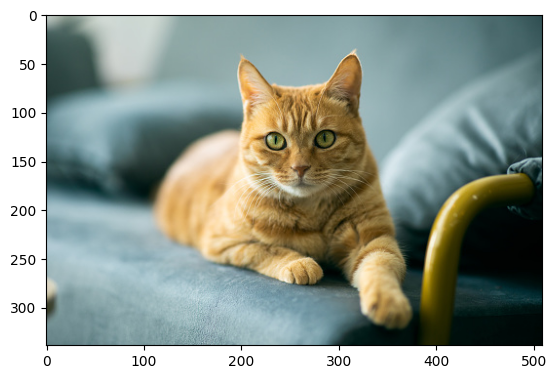

In [92]:
import cv2
test_image = cv2.imread('Dataset/single_prediction/cat.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()


In [104]:
# Part 3 Making new predictions
import numpy as np
from keras_preprocessing import image

test_image = image.load_img('Dataset/single_prediction/dog.webp',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] ==1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
print(prediction)

1/1 [==============================] - 0s 12ms/step
Dog


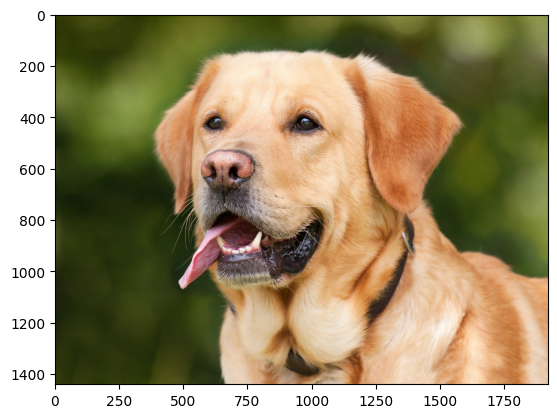

In [107]:
import cv2
test_image = cv2.imread('Dataset/single_prediction/dog.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()
